In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sympy.ntheory import isprime, quadratic_residues
#from tqdm import tqdm

## Perlin Noise

In [2]:
#!pip3 install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /private/var/folders/bf/1zrl6cfj69b9p252q9m92kp00000gn/T/pip-req-build-rj7wwx6w
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /private/var/folders/bf/1zrl6cfj69b9p252q9m92kp00000gn/T/pip-req-build-rj7wwx6w
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done
  Created wheel for perlin-numpy: filename=perlin_numpy-0.0.0-py3-none-any.whl size=4724 sha256=a3f12092fd1ba777a614dba92f60d3732193b007a0711c6bfeca3825b93fe0e7
  Stored in directory: /private/var/folders/bf/1zrl6cfj69b9p252q9m92kp00000gn/T/pip-ephem-wheel-cache-amk7iqfo/wheels/e1/27/2f/c4a80de6e28009b6fd435bb52156a16937c7939e5dcdbc9850
Successfully built perlin-numpy


In [2]:
from perlin_numpy import generate_perlin_noise_2d

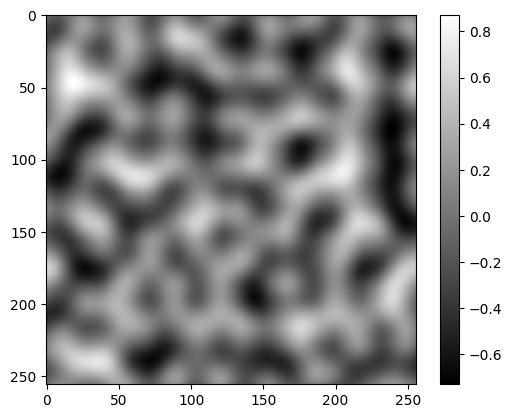

In [3]:
noise = generate_perlin_noise_2d((256, 256), (8, 8))
plt.imshow(noise, cmap='gray')#, interpolation='lanczos')
plt.colorbar()

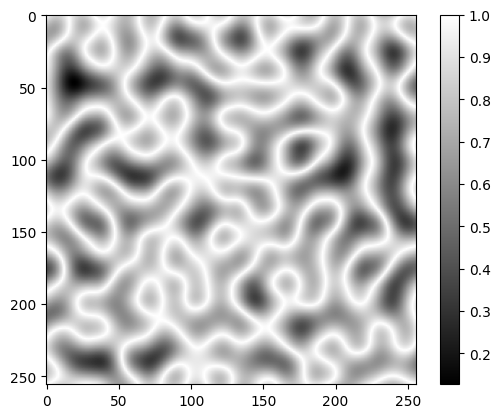

In [12]:
plt.imshow(1 - abs(noise), cmap='gray')#, interpolation='lanczos')
plt.colorbar()

In [13]:
plt.savefig('perlin_minus_abs.png')

<Figure size 640x480 with 0 Axes>

In [18]:
noise.shape

(256, 256)

In [14]:
np.save("perlin_minus_abs.npy", noise)